In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../Data/diabetes.csv")

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

***Check for missing values***

In [32]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

***Check for duplicates***

In [33]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

***Description of our data(statistics)***

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***Identify columns with zeros***
**(Zeros might indicate missing values)**

In [35]:
zeros = (df == 0).sum()
zeros
# From the above columns like Glucose,blood pressure,skin thickness,insulin and BMI contain zero values which are likely to be missing values.

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

***Replace zeros with Nan***

In [36]:
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)
# Check for null again
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

***Handle missing values using imputation techniques such as median or mean.***

In [37]:
# Impute with median as it is robust to outliers
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]: df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

***Check for outliers***

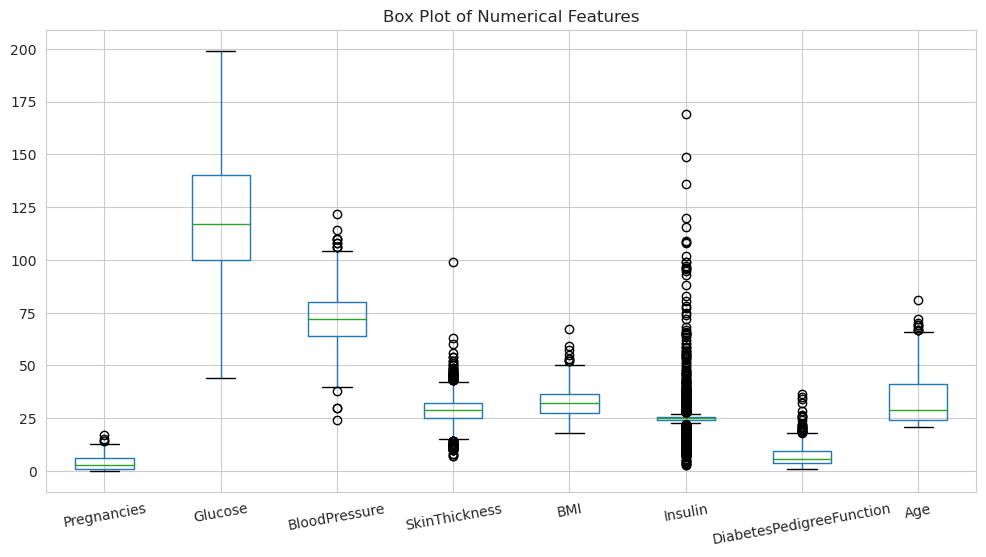

In [38]:
sns.set_style("whitegrid")

df_scaled = df.copy()
df_scaled["DiabetesPedigreeFunction"] *=15 # Scale up this feature
df_scaled["Insulin"] /=5 # Scale down this feature
plt.figure(figsize=(12, 6))
df_scaled.boxplot(column=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin", "DiabetesPedigreeFunction", "Age"])
plt.xticks(rotation=10)
plt.title("Box Plot of Numerical Features")
plt.show()
# The box plot reveals some potential outliers

***Confirm outliers using Interquartile Range method***

In [39]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

# Check number of outliers in each numerical column
outliers_count = {col: detect_outliers_iqr(df, col) for col in ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]}
outliers_count

{'Pregnancies': 4,
 'Glucose': 0,
 'BloodPressure': 14,
 'SkinThickness': 87,
 'BMI': 8,
 'DiabetesPedigreeFunction': 29,
 'Age': 9}

***Cap outlier values preserve data while reducing extremes***
**(Remove insulin as it has too many missing values)**

In [40]:
# Function to cap outliers using IQR bounds
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Apply capping on selected columns
for col in ["BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]:
    cap_outliers(df, col)

df.drop(columns=["Insulin"], inplace=True)
# Verify if extreme values are capped
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.358073,28.866536,32.393359,0.458914,33.199870,0.348958
std,3.369578,30.438286,11.697097,7.442353,6.667471,0.285596,11.628404,0.476951
min,0.000000,44.000000,40.000000,14.500000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,104.000000,42.500000,50.250000,1.200000,66.500000,1.000000


***Scaling Numerical features to standardize for better model performance***

In [64]:
scaler = StandardScaler()

# Columns to scale (excluding the target variable "Outcome")
numerical_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]

# Apply standard scaling
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows after scaling
df.head()
# Some algorithms are sensitive to feature magnitudes, so scaling helps prevent bias and instability in models.


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.030632,0.824667,0.181092,0.588927,1.445691,1
1,-0.844885,-1.205066,-0.543914,0.017945,-0.869465,-0.378101,-0.189304,0
2,1.233880,2.016662,-0.715008,0.017945,-1.364728,0.746595,-0.103252,1
3,-0.844885,-1.073567,-0.543914,-0.788777,-0.644346,-1.022787,-1.049828,0
4,-1.141852,0.504422,-2.768136,0.824667,1.606849,2.596563,-0.017199,1


***Visualizations***

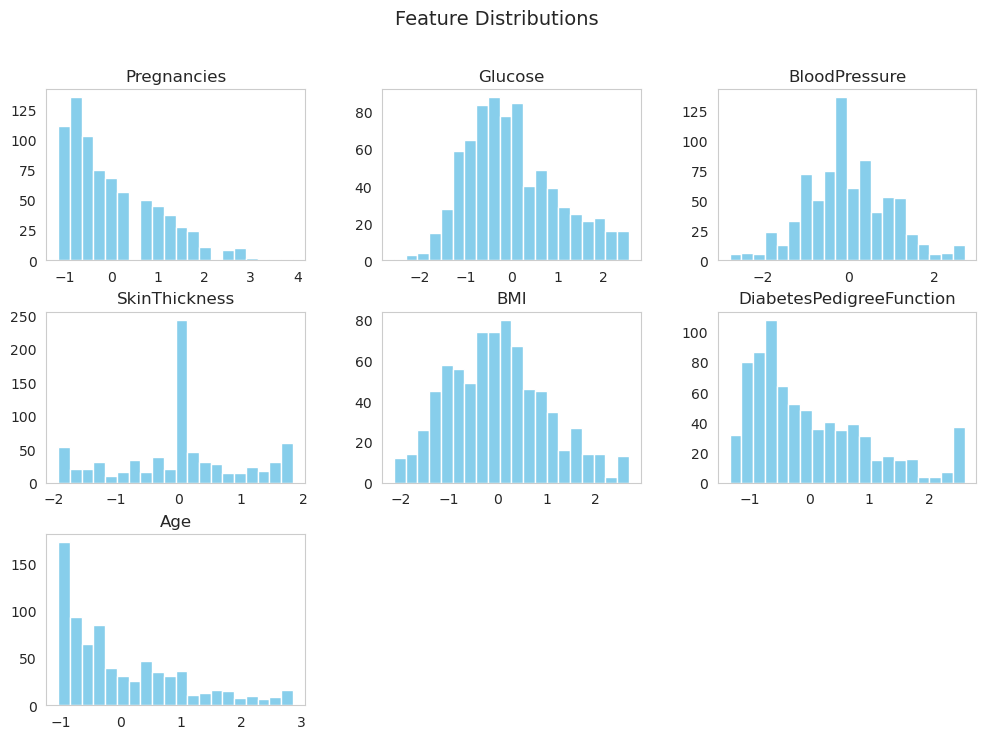

In [65]:
# Plot histograms for numerical features
df[numerical_columns].hist(figsize=(12, 8), bins=20, grid=False, color="skyblue")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


***Correlatin maxtrix***

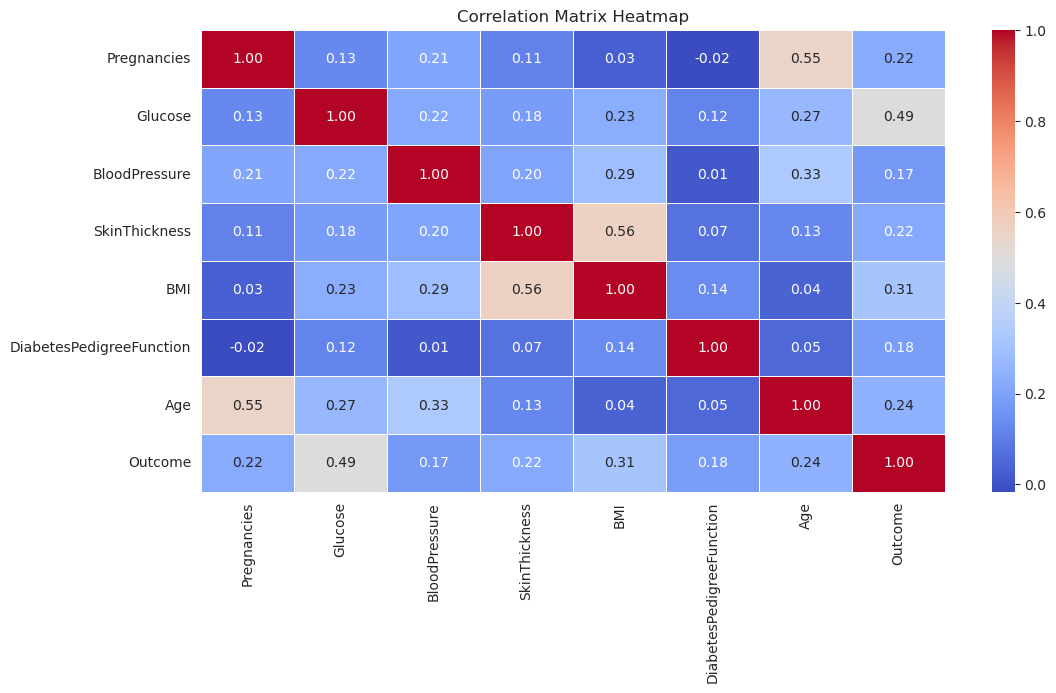

In [66]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


***Count plot for the outcome***

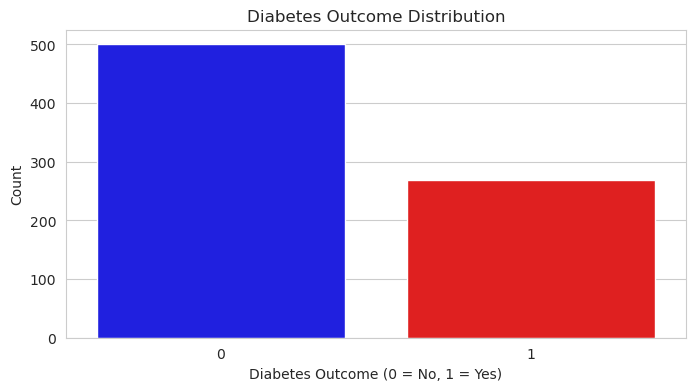

In [67]:
plt.figure(figsize=(8, 4))
sns.countplot(
    x="Outcome", 
    data=df, 
    hue="Outcome",  # Set Outcome as hue
    palette={0: "blue", 1: "red"},  # Assign colors to each class
    legend=False  # Hide duplicate legend
)
plt.xlabel(f'Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel("Count")
plt.title("Diabetes Outcome Distribution")
plt.show()
# Most people in the data do not have diabetes

***How Glucos Differ Between Diabetics and Non-Diabetics***

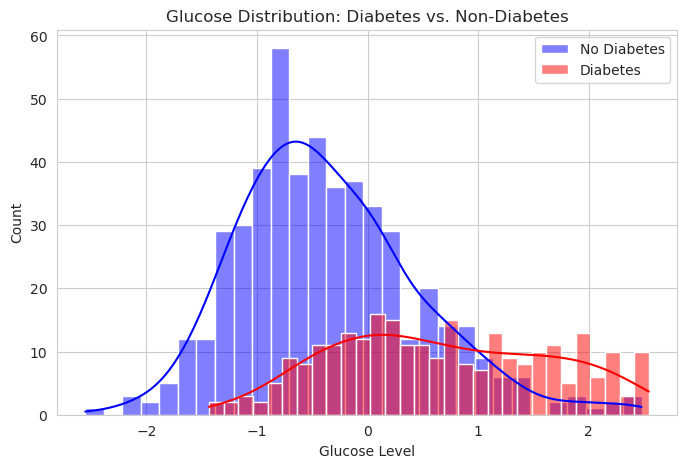

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["Outcome"] == 0]["Glucose"], color="blue", label="No Diabetes", kde=True, bins=30)
sns.histplot(df[df["Outcome"] == 1]["Glucose"], color="red", label="Diabetes", kde=True, bins=30)
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.title("Glucose Distribution: Diabetes vs. Non-Diabetes")
plt.legend()
plt.show()
# It is seen that diabetics tend to have higher glucose levels.


***Age Distribution Between Diabetics & Non-Diabetics***


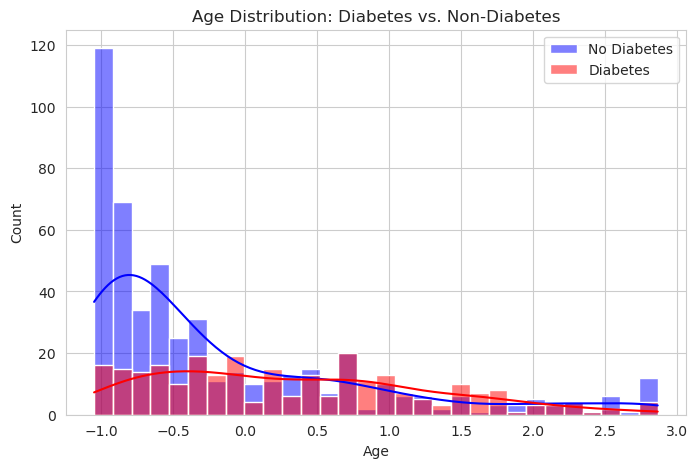

In [69]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["Outcome"] == 0]["Age"], color="blue", label="No Diabetes", kde=True, bins=30)
sns.histplot(df[df["Outcome"] == 1]["Age"], color="red", label="Diabetes", kde=True, bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution: Diabetes vs. Non-Diabetes")
plt.legend()
plt.show()

# Diabetes is more common in older individuals.
# Younger individuals (under 30) have a lower risk, but it still exists.

***BMI between Diabetics and Non-Diabetics***

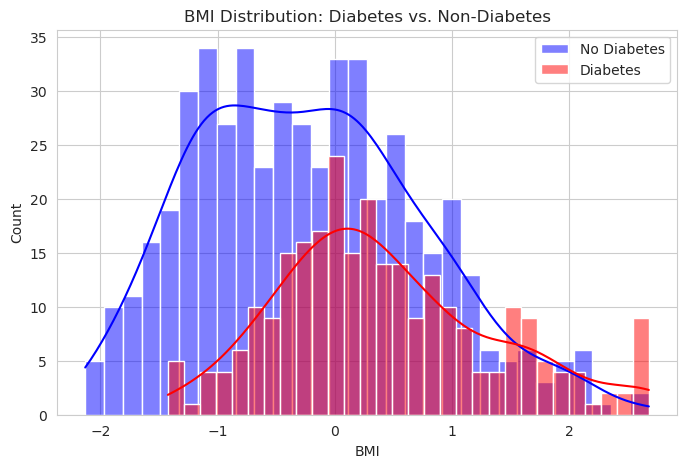

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["Outcome"] == 0]["BMI"], color="blue", label="No Diabetes", kde=True, bins=30)
sns.histplot(df[df["Outcome"] == 1]["BMI"], color="red", label="Diabetes", kde=True, bins=30)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution: Diabetes vs. Non-Diabetes")
plt.legend()
plt.show()
# Higher BMI values increase diabetes risk.